### Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Este conjunto de datos contiene información sobre las páginas de Facebook de 10 vendedores minoristas de moda y cosméticos en Tailandia.

Los datos incluyen publicaciones de diferentes tipos, como videos, fotos, estados y enlaces. Las métricas de participación en estas publicaciones, que consisten en comentarios, compartidos y reacciones, también se registran en el conjunto de datos.

Este conjunto de datos se utilizará  para realizar análisis de datos exploratorios, visualizar los datos, realizar agrupaciones mediante el algoritmo k-means y clustering jerárquico con el fin de analizar las características y clasificación de los grupos.


Antes de empezar a utilizar los diversos algoritmos, procederemos a efectuar la limpieza y preprocesado de los datos.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import pyplot
warnings.filterwarnings('ignore')


df = pd.read_csv('/Users/alexvalles/Publicacions Facebook Thailandia.csv', encoding='utf-8')  

df


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [3]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
# miramos si hay filas con valores nulos

filas_val_nulos = df.isnull().any(axis=1)

# Mostramos las filas que contienen valores nulos
filas_val_nulos = df[filas_val_nulos]

# DataFrame resultante (no existen filas con valores nulos)
filas_val_nulos

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# eliminamos las 4 últimas columnas del dataset, no tienen datos y por tanto no son relevantes

df = df[df.columns[:-4]]
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:

# Verificamos filas duplicadas en la columna 'status_id'
duplicados = df.duplicated(['status_id'])

# Filas duplicadas
df_duplicado = df[duplicados]

df_duplicado.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0


In [8]:
# total de filas duplicadas
total_duplic = len(df_duplicado)
print("Total de filas duplicadas:", total_duplic)


Total de filas duplicadas: 53


In [9]:
# eliminamos los duplicados en status_id

df.drop_duplicates(['status_id'], inplace=True)
print("DataFrame modificado sin filas duplicadas:")
df


DataFrame modificado sin filas duplicadas:


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [10]:
df.nunique()

status_id           6997
status_type            4
status_published    6911
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [11]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [12]:
tipos_totales = df['status_type'].value_counts()

In [13]:
tipos_totales

status_type
photo     4242
video     2333
status     359
link        63
Name: count, dtype: int64

In [14]:
# eliminamos status_id, no es relevante para nuestro modelo

df.drop('status_id', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6997 non-null   object
 1   status_published  6997 non-null   object
 2   num_reactions     6997 non-null   int64 
 3   num_comments      6997 non-null   int64 
 4   num_shares        6997 non-null   int64 
 5   num_likes         6997 non-null   int64 
 6   num_loves         6997 non-null   int64 
 7   num_wows          6997 non-null   int64 
 8   num_hahas         6997 non-null   int64 
 9   num_sads          6997 non-null   int64 
 10  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.0+ KB


In [16]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [17]:
# eliminamos la fecha. Nos podría servir para ver publicaciones y reacciones por fecha, pero no vamos a trabajar con estos datos en esta ocasión

df = df.drop('status_published', axis=1)


In [18]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [19]:
# comprobamos el total de reacciones

total_reactions = df[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Mostrar el resultado
print(total_reactions)

num_likes     1468669
num_loves       89248
num_wows         8769
num_hahas        4885
num_sads         1628
num_angrys        771
dtype: int64


In [20]:
total_reactions.sum()

1573970

In [21]:
# Podemos ver que hay algunas pequeñas diferencias en los totales de num_reactions. Miraremos qué totales son los efectivos.


df['suma_reactions'] = df[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum(axis=1)


print(df[['status_type', 'suma_reactions']])


     status_type  suma_reactions
0          video             529
1          photo             150
2          video             227
3          photo             111
4          photo             213
...          ...             ...
7045       photo              89
7046       photo              16
7047       photo               2
7048       photo             351
7049       photo              17

[6997 rows x 2 columns]


In [22]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,suma_reactions
0,video,529,512,262,432,92,3,1,1,0,529
1,photo,150,0,0,150,0,0,0,0,0,150
2,video,227,236,57,204,21,1,1,0,0,227
3,photo,111,0,0,111,0,0,0,0,0,111
4,photo,213,0,0,204,9,0,0,0,0,213
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,89
7046,photo,16,0,0,14,1,0,1,0,0,16
7047,photo,2,0,0,1,1,0,0,0,0,2
7048,photo,351,12,22,349,2,0,0,0,0,351


In [23]:
# Calculamos la diferencia entre 'suma_reactions' y 'num_reactions'

df['diferencia_reactions'] = df['suma_reactions'] - df['num_reactions']

In [24]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,suma_reactions,diferencia_reactions
0,video,529,512,262,432,92,3,1,1,0,529,0
1,photo,150,0,0,150,0,0,0,0,0,150,0
2,video,227,236,57,204,21,1,1,0,0,227,0
3,photo,111,0,0,111,0,0,0,0,0,111,0
4,photo,213,0,0,204,9,0,0,0,0,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,89,0
7046,photo,16,0,0,14,1,0,1,0,0,16,0
7047,photo,2,0,0,1,1,0,0,0,0,2,0
7048,photo,351,12,22,349,2,0,0,0,0,351,0


In [25]:
# Filtramos las filas donde 'diferencia_reactions' es diferente de 0
filas_con_diferencia = df.loc[df['diferencia_reactions'] != 0]

# filas con diferencias en la suma de reacciones
print(filas_con_diferencia[['status_type', 'num_reactions', 'suma_reactions', 'diferencia_reactions']])

    status_type  num_reactions  suma_reactions  diferencia_reactions
238       video            885             881                    -4
247       photo            264             263                    -1
248       photo            313             310                    -3
251       photo            247             244                    -3
253       photo            387             385                    -2
254       photo            178             176                    -2
256       photo            270             269                    -1
257       photo            351             350                    -1
293       video            616             614                    -2


In [26]:
# Ahora modificamos sólo las filas con diferencias
df['num_reactions'] = df.apply(lambda row: row['suma_reactions'] if row['diferencia_reactions'] != 0 else row['num_reactions'], axis=1)


In [27]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,suma_reactions,diferencia_reactions
0,video,529,512,262,432,92,3,1,1,0,529,0
1,photo,150,0,0,150,0,0,0,0,0,150,0
2,video,227,236,57,204,21,1,1,0,0,227,0
3,photo,111,0,0,111,0,0,0,0,0,111,0
4,photo,213,0,0,204,9,0,0,0,0,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,89,0
7046,photo,16,0,0,14,1,0,1,0,0,16,0
7047,photo,2,0,0,1,1,0,0,0,0,2,0
7048,photo,351,12,22,349,2,0,0,0,0,351,0


In [28]:
# eliminamos suma_reactions y diferencia_reactions

df = df.drop(['suma_reactions', 'diferencia_reactions'], axis=1)

In [29]:
# Hacemos reset del índice

df.reset_index(inplace=True, drop=True)

In [30]:
# Ya tenemos el dataframe preparado:

df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6992,photo,89,0,0,89,0,0,0,0,0
6993,photo,16,0,0,14,1,0,1,0,0
6994,photo,2,0,0,1,1,0,0,0,0
6995,photo,351,12,22,349,2,0,0,0,0


In [31]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [32]:
# Visualizamos datos en 3D

import plotly.express as px

colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2], colors[3] = ['red', 'yellow', 'blue', 'green']
fig = px.scatter_3d(df, x='num_comments', y='num_reactions', z='num_shares', color=df['status_type'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=True,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

El gráfico es una representación tridimensional que muestra las reacciones, comentarios y acciones compartidas en función del tipo de contenido (video, foto, enlace, estado). Aquí está la interpretación detallada:

Los puntos rojos (videos) están dispersos a lo largo del eje "num_reactions" y "num_comments", indicando que los videos tienden a recibir más reacciones y comentarios.
Los puntos verdes (fotos), amarillos (enlaces) y azules (estados) están principalmente concentrados cerca del origen, mostrando menos interacción.
No hay muchos datos que se extiendan hacia el eje "num_shares", lo que indica que compartir es menos común para todos los tipos de contenido.

En resumen, parece que los videos tienden a recibir más interacciones en comparación con las fotos, los enlaces y los estados. Sin embargo, compartir es menos común para todos los tipos de contenido.

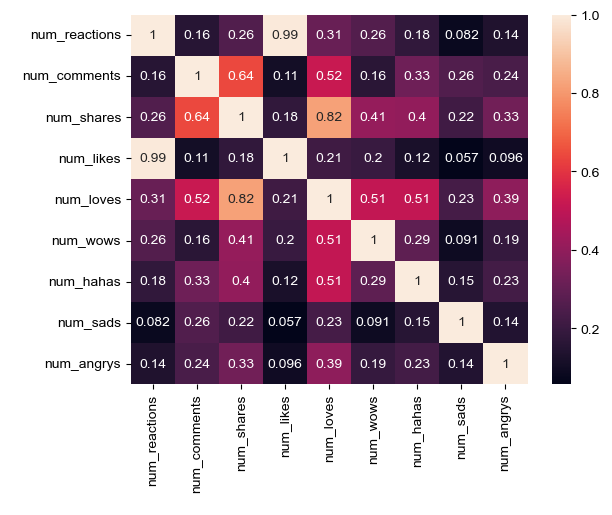

In [33]:
# Filtramos las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])


sns.heatmap(numeric_columns.corr(), annot=True)
sns.set(rc={"figure.figsize": (12, 6)})

Hay una correlación negativa muy fuerte entre 'num_likes' y 'num_reactions'. 

Correlación entre 'num_loves', 'num_shares' y 'num_comments': 'num_loves' tiene una correlación positiva fuerte con 'num_shares' y 'num_comments'. Esto sugiere que las publicaciones que reciben más “loves” también tienden a ser compartidas y comentadas.

Correlación de 'num_sads' y 'num_angrys' con otras variables: Las reacciones “sads” y “angrys” no muestran correlaciones fuertes con otras variables, indicando que son relativamente independientes de la cantidad total de reacciones, comentarios o compartidos.

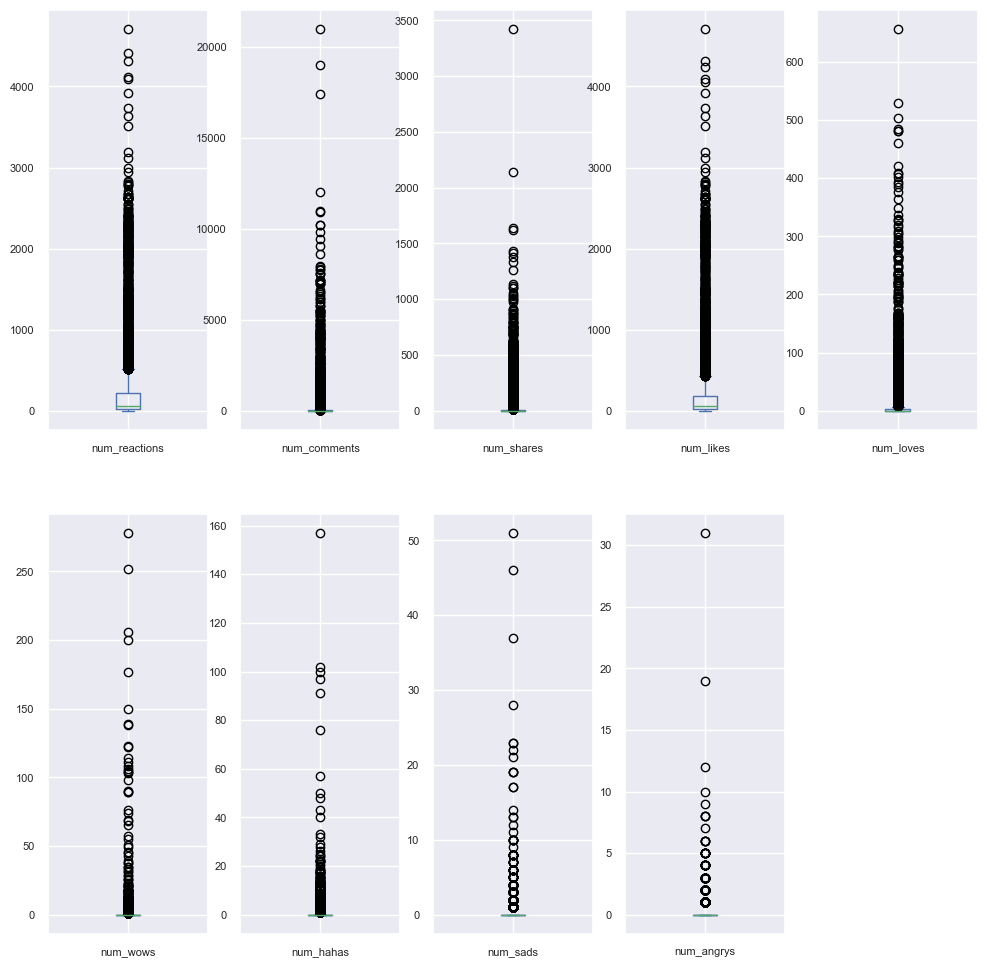

In [34]:
df.plot(kind='box',subplots=True, layout=(2,5), fontsize=8, figsize=(12,12));

Los boxplots en tu imagen representan la distribución de diferentes variables relacionadas con las reacciones en las redes sociales. 


'num_reactions' y 'num_likes' tienen muchos valores atípicos que se extienden hasta 40000, lo que indica que algunas publicaciones reciben muchas más reacciones y "me gusta" que la mayoría.
'num_comments' también tiene varios valores atípicos, pero menos en comparación con 'num_reactions', lo que sugiere que algunas publicaciones reciben muchos más comentarios que otras.
'num_shares' tiene pocos valores atípicos, lo que indica que la mayoría de las publicaciones tienen un número similar de compartidos.
'num_loves' tiene una concentración densa de datos cerca del valor más bajo y algunos valores atípicos, lo que sugiere que la mayoría de las publicaciones reciben pocas reacciones de "me encanta", pero algunas reciben muchas.

Para las variables  num_wows, num_hahas, num_sads y num_angrys:
Todos estos boxplots tienen una cantidad significativa de datos concentrados cerca del valor más bajo y presentan varios valores atípicos. Esto sugiere que la mayoría de las publicaciones reciben pocas reacciones de "wows", "hahas", "sads" y "angrys", pero algunas reciben muchas.

En resumen, los boxplots muestran que la mayoría de las publicaciones en las redes sociales reciben un número moderado de reacciones, pero hay algunas publicaciones que se destacan con muchas más reacciones. Estas publicaciones son los valores atípicos en tus gráficos. 

<Figure size 1200x1200 with 0 Axes>

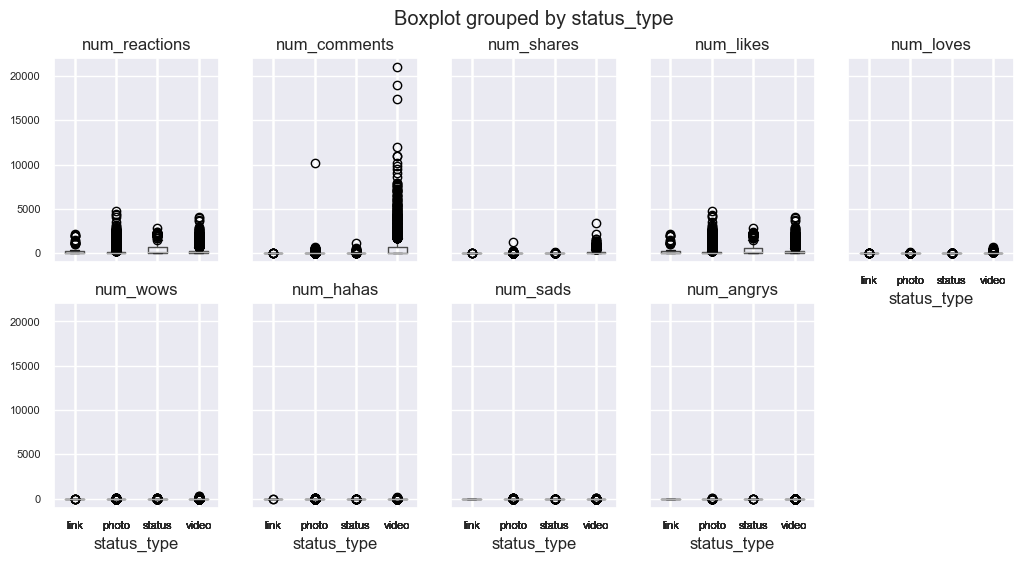

In [35]:


plt.figure(figsize=(12, 12))
df.boxplot(column=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
            by='status_type', layout=(2, 5), fontsize=8)

plt.show()

El boxplot  representa la distribución de diferentes tipos de reacciones en Facebook (reacciones, comentarios, compartidos, likes, loves, wows, hahas, sads y angrys) agrupadas por tipo de estado (link, foto, estado y video). Aquí está una interpretación detallada:

1. Reacciones: Los boxplots muestran la cantidad de cada tipo de reacción para los diferentes tipos de estados. 
2. Comentarios: El boxplot para "num_comments" muestra una mayor dispersión y outliers, lo que indica una variabilidad significativa en el número de comentarios según el tipo de estado.
3. Otros tipos de reacciones: Los demás boxplots (num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys) muestran una concentración baja con pocos outliers, lo que indica que la mayoría de las publicaciones tienen un número relativamente bajo de estas reacciones.

En resumen, este boxplot proporciona una visión general de cómo se distribuyen las diferentes reacciones en Facebook según el tipo de estado. Los comentarios parecen tener la mayor variabilidad, mientras que las otras reacciones tienden a ser menos frecuentes.

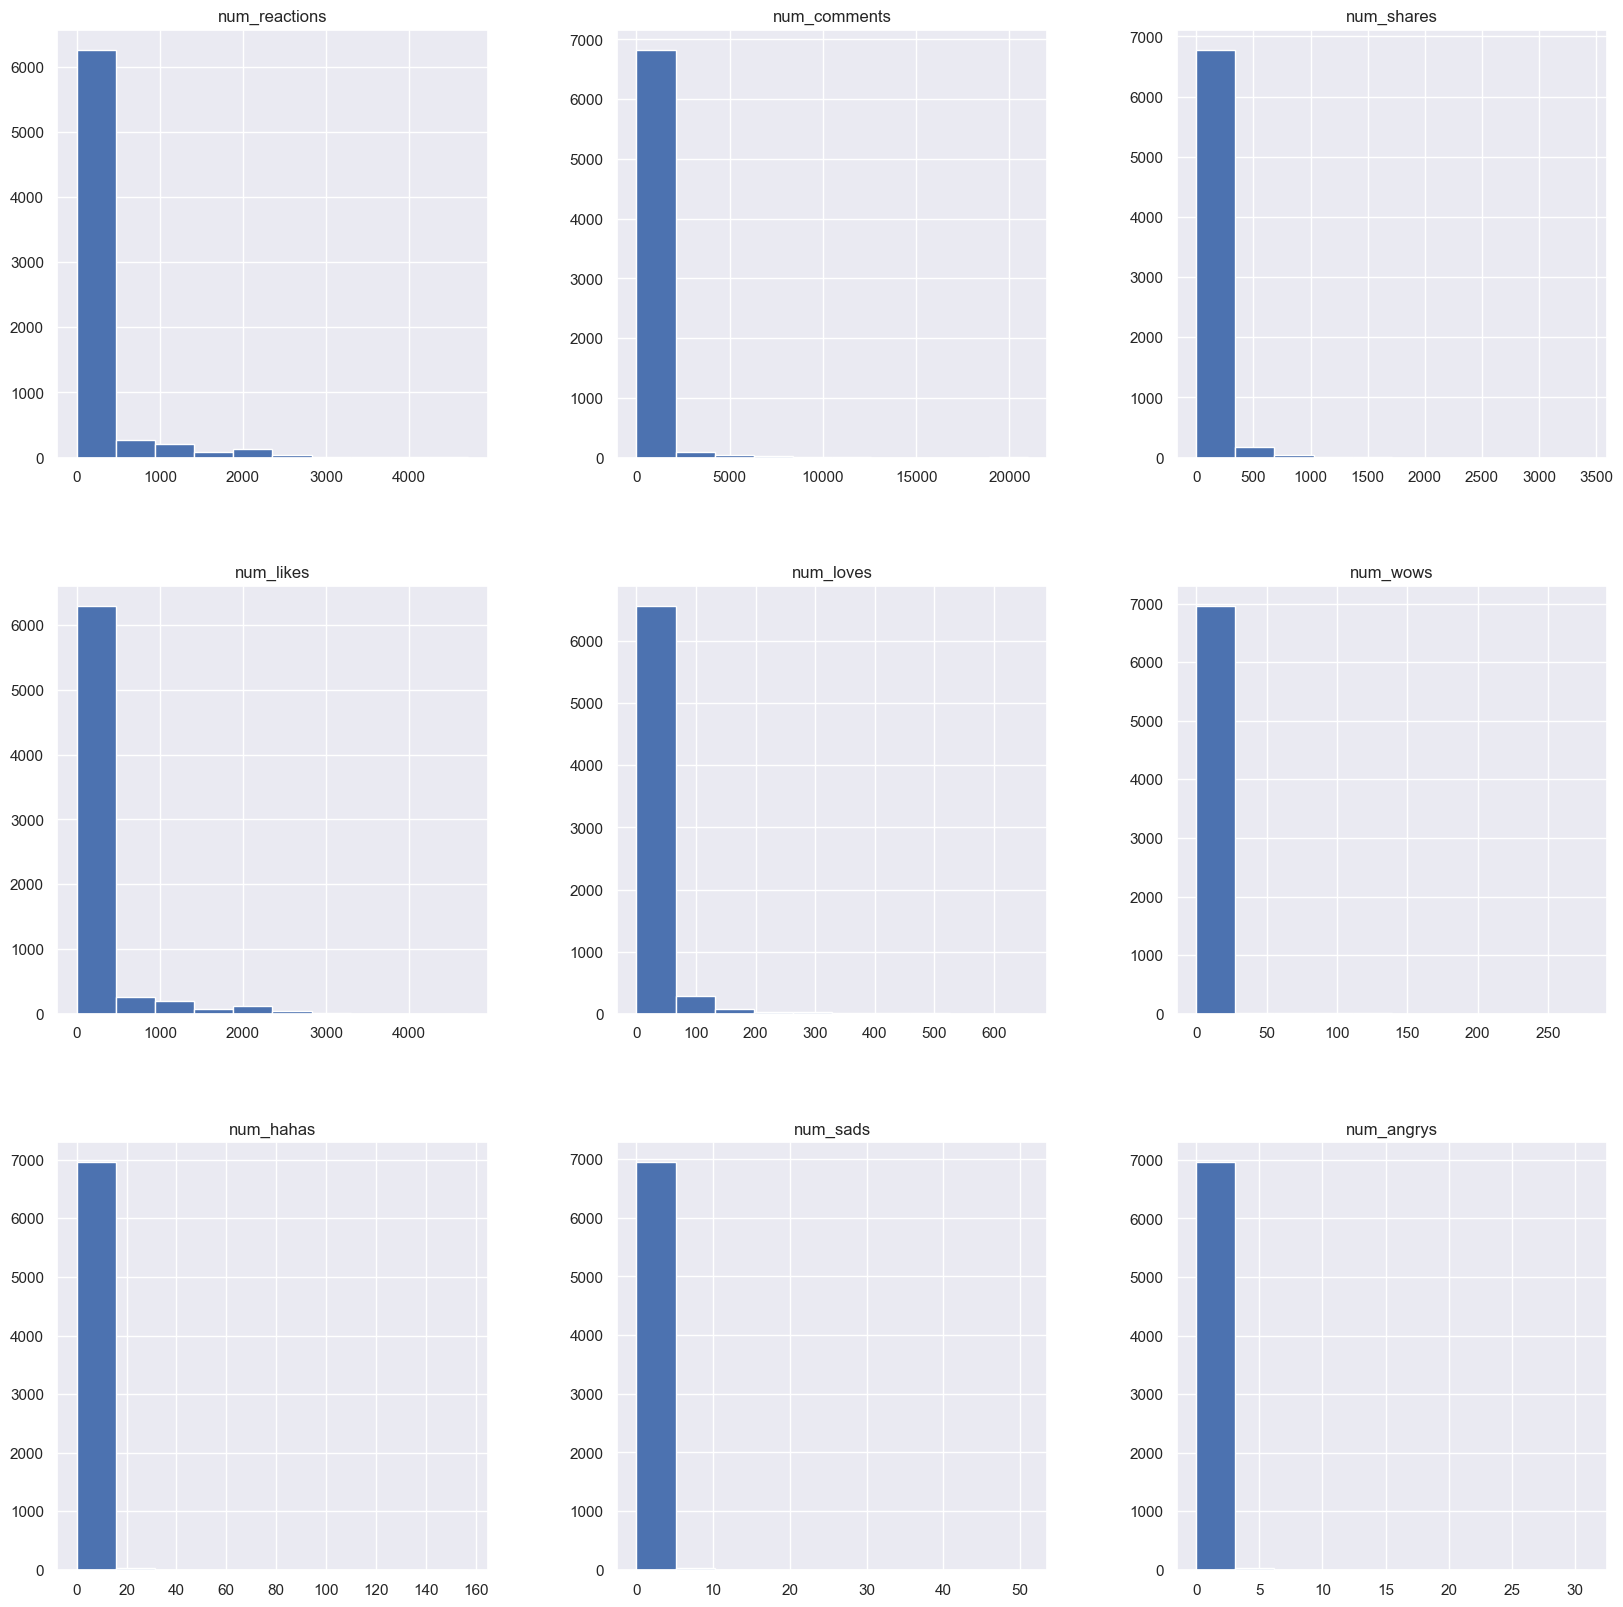

In [36]:
df.hist(figsize=(20,20));

El histograma representa la distribución de frecuencias de diferentes variables en Facebook, como "num_reactions", "num_comments", entre otros. 

Los histogramas muestran la cantidad de cada tipo de reacción. Todos los histogramas muestran una distribución sesgada a la derecha, donde la mayoría de los datos se concentran en el extremo izquierdo del eje x.

La mayoría de los datos están concentrados en el primer bin, indicando una alta frecuencia de valores bajos para todas las variables presentadas. Esto sugiere que la mayoría de las publicaciones en Facebook reciben un número relativamente bajo de reacciones.

<Figure size 2000x2000 with 0 Axes>

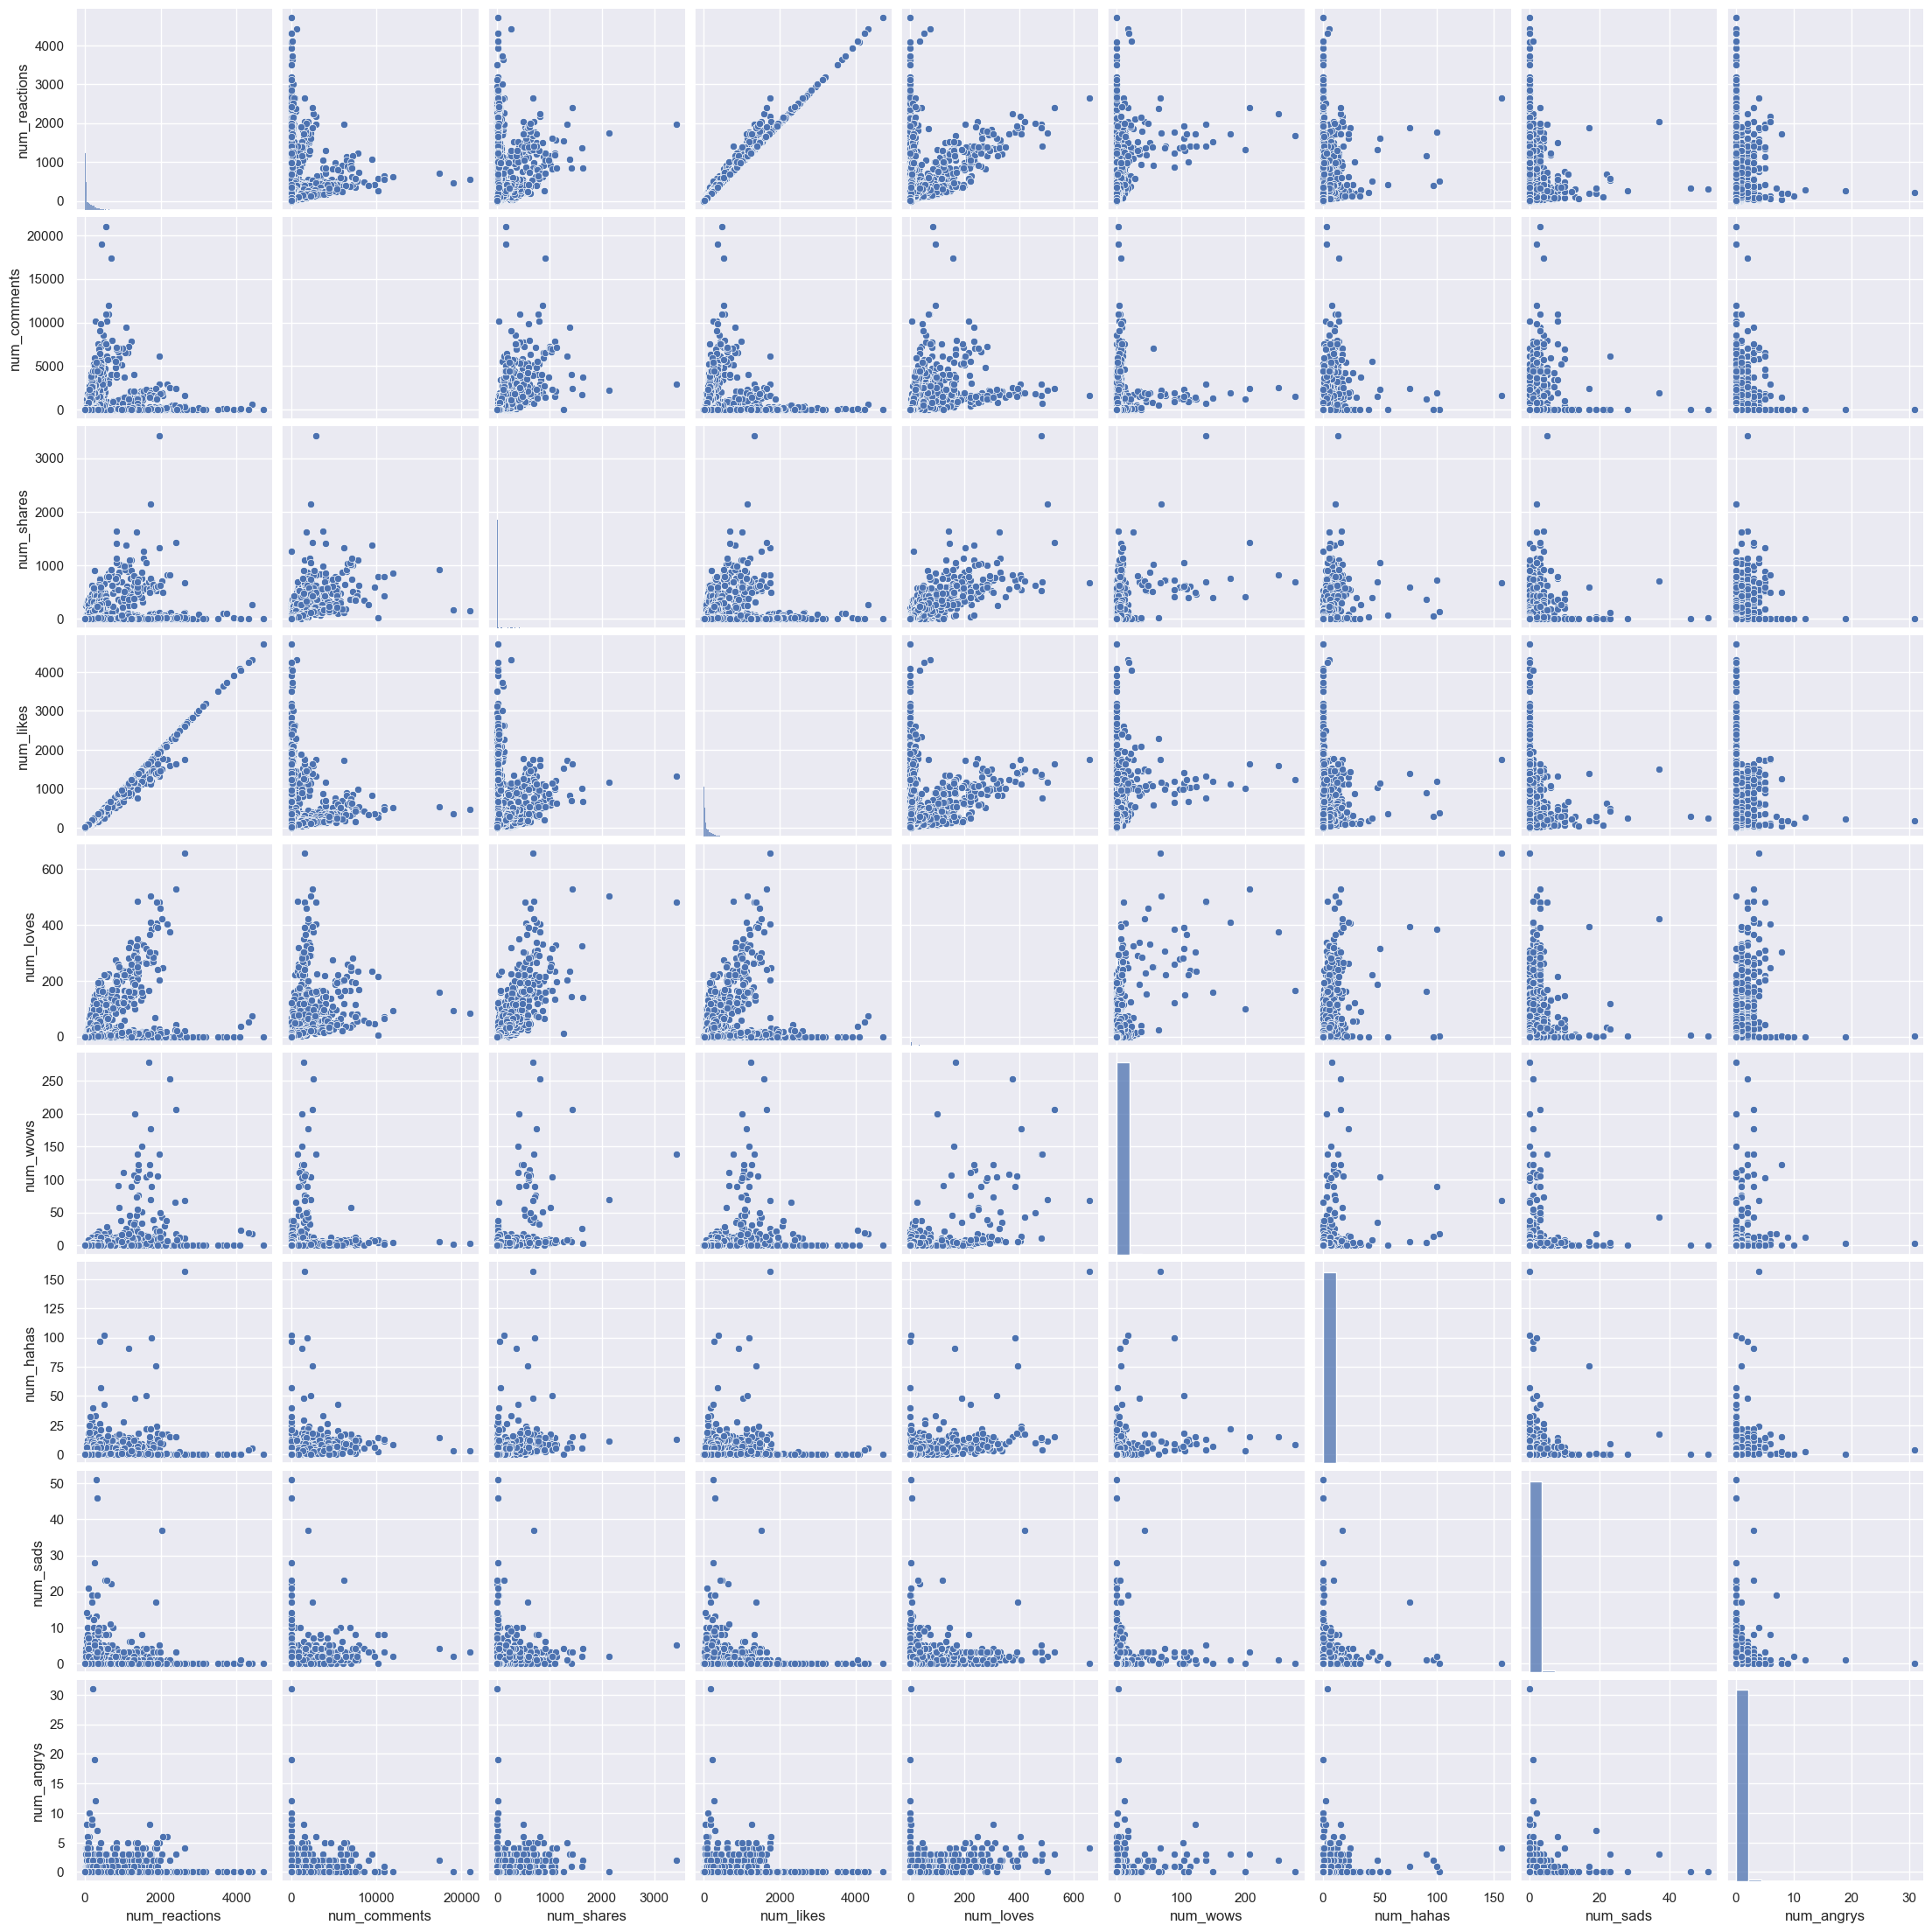

In [37]:
#Hacemos un pairplot del dataframe para ver como se comportan los diferentes registros.

plt.figure(figsize=(20,20))
sns.pairplot(df);

Podemos ver la relación entre reacciones y likes:

In [39]:
react = df['num_reactions']

react.head()

0    529
1    150
2    227
3    111
4    213
Name: num_reactions, dtype: int64

In [40]:
likes = df['num_likes']

likes.head()

0    432
1    150
2    204
3    111
4    204
Name: num_likes, dtype: int64

Text(0.5, 1.0, 'REACTION VS LIKES')

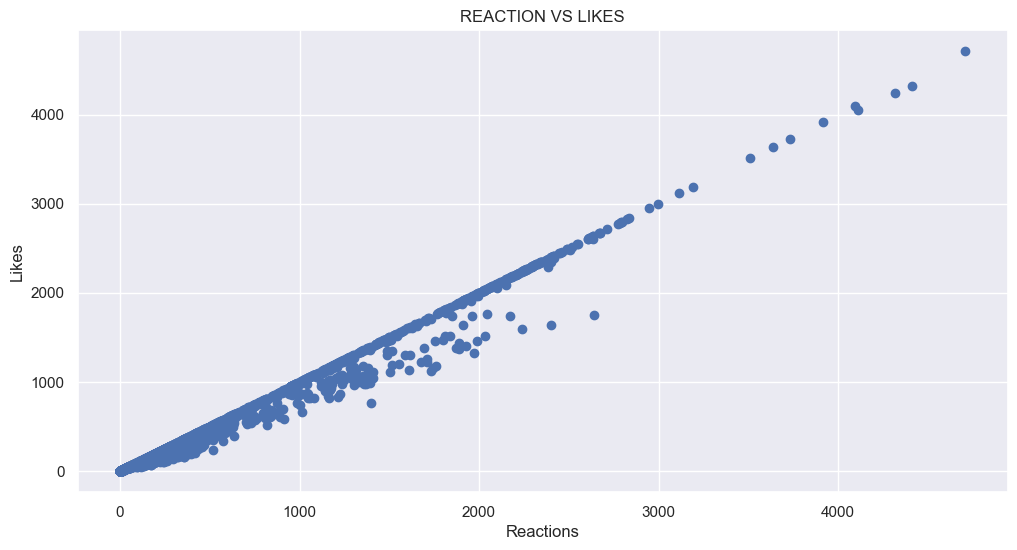

In [41]:
plt.scatter(react,likes, label = 'True Position')
plt.xlabel("Reactions")
plt.ylabel("Likes")
plt.title("REACTION VS LIKES")

Observando el gráfico, se puede ver una correlación positiva entre las reacciones y los likes. Esto significa que a medida que aumenta el número de reacciones, también lo hace el número de likes. La línea azul representa esta tendencia general.

Además, hay una concentración densa de puntos en la parte inferior izquierda del gráfico, lo que indica que hay muchas observaciones con bajas reacciones y likes.

También cabe destacar la relación entre comments y loves:

In [42]:
comments = df["num_comments"]
love = df["num_loves"]

Text(0.5, 1.0, 'COMMENTS VS LOVES')

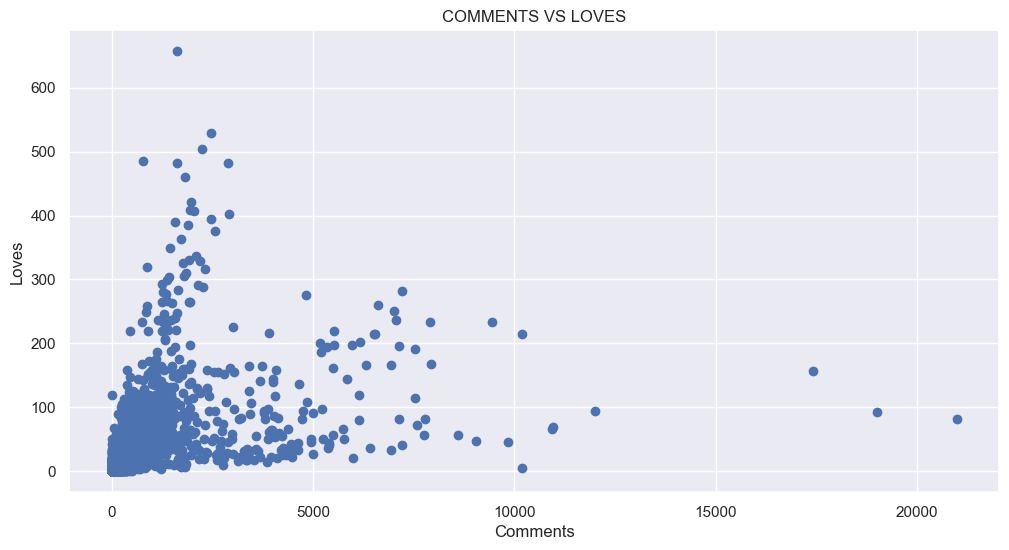

In [43]:
plt.scatter(comments,love)
plt.xlabel("Comments")
plt.ylabel("Loves")
plt.title("COMMENTS VS LOVES")

Los puntos están concentrados principalmente en el área inferior izquierda. Esto indica que hay un alto número de instancias con pocos comentarios y “loves”. Además, hay algunos puntos dispersos a lo largo del eje X, lo que indica situaciones donde hay un número moderado a alto de comentarios pero pocos “loves”.

No se observa una correlación clara o lineal visible entre los comentarios y los “loves”. Esto podría indicar que recibir más comentarios no necesariamente se traduce en recibir más “loves”.

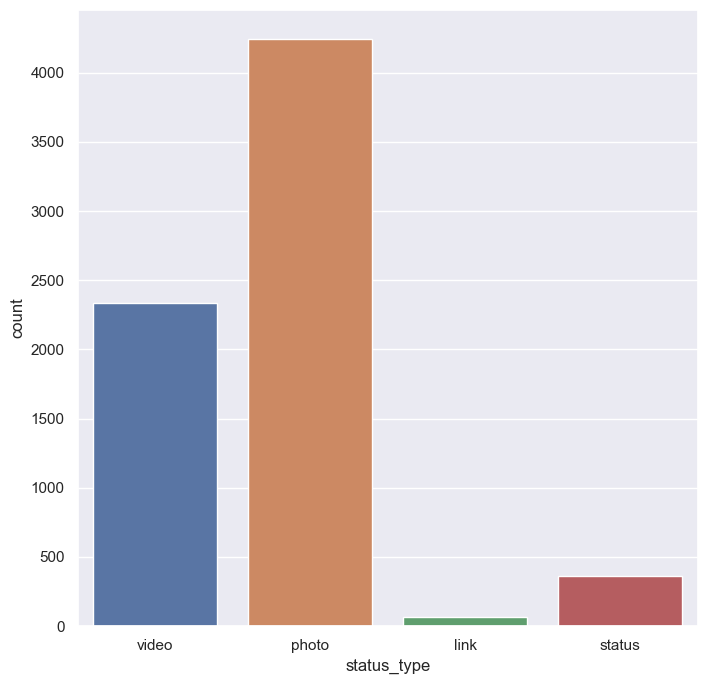

In [44]:
# Visualizamos los totales de video, photo, link y status

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(8, 8))
sns.countplot(x='status_type', data=df)
plt.show()


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Realizamos la codificación de la variable categórica 'status_type', con labelEncoder

le = LabelEncoder()
df['status_type_encoded'] = le.fit_transform(df['status_type'])


In [46]:
df['status_type_encoded'].unique()

array([3, 1, 0, 2])

In [47]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [48]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded
0,video,529,512,262,432,92,3,1,1,0,3
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,3
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6992,photo,89,0,0,89,0,0,0,0,0,1
6993,photo,16,0,0,14,1,0,1,0,0,1
6994,photo,2,0,0,1,1,0,0,0,0,1
6995,photo,351,12,22,349,2,0,0,0,0,1


In [49]:

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
y = df['status_type']


In [50]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6992,89,0,0,89,0,0,0,0,0
6993,16,0,0,14,1,0,1,0,0
6994,2,0,0,1,1,0,0,0,0
6995,351,12,22,349,2,0,0,0,0


In [51]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
6992    photo
6993    photo
6994    photo
6995    photo
6996    photo
Name: status_type, Length: 6997, dtype: object

A continuación escalaremos datos. Hemos podido comprobar la existencia de outliers, pero estos outliers son importantes en nuestro caso, no interesa minimizarlos. Por ejemplo en el caso de 'video' tenemos muchos outliers, pero éstos nos dan una información importante. Estos outliers nos indican que son videos que han obtenido un gran número de reacciones, que es un aspecto clave y de gran relevancia que hay que tener en cuenta. Interesa tener la máxima repercusión en las publicaciones.

Por tanto, no utilizaremos Robust Scaler, sino que MixMax scaler.

In [52]:
# Escalamos los datos. 

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Aplicamos el PCA de 2 componentes con los datos escalados

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [54]:
# Exploramos la varianza explicada por cada componente principal:

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [55]:
print("ratio de varianza explicada:", explained_variance_ratio)

print("varianza explicada acumulada:",cumulative_explained_variance)

ratio de varianza explicada: [0.66360866 0.20004078]
varianza explicada acumulada: [0.66360866 0.86364944]


Para el primer componente principal, el 66.36% de la varianza total en los datos es explicada por esta componente.
Para el segundo componente principal, el 20.00% de la varianza total en los datos es explicada por esta componente.

En total, ambos componentes explican el 86.36% de la varianza en los datos. Este valor indica la proporción de la variabilidad original de los datos que es capturada por las componentes principales seleccionadas. En este caso, el 86.36% sugiere que la reducción de dimensionalidad a dos componentes principales retiene la mayoría de la información en los datos originales.

In [56]:
# Creamos un nuevo DataFrame con los 2 componentes principales y la variable categórica 'status_type'

df_pca = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca['status_type'] = df['status_type']

df_pca



,PC1,PC2,status_type
0,0.105164,0.106953,video
1,-0.025524,-0.021499,photo
2,0.001872,0.010861,video
3,-0.036944,-0.018938,photo
4,-0.006063,-0.015334,photo
...,...,...,...
6992,-0.043386,-0.017493,photo
6993,-0.064538,-0.010435,photo
6994,-0.068749,-0.010636,photo
6995,0.034189,-0.029395,photo


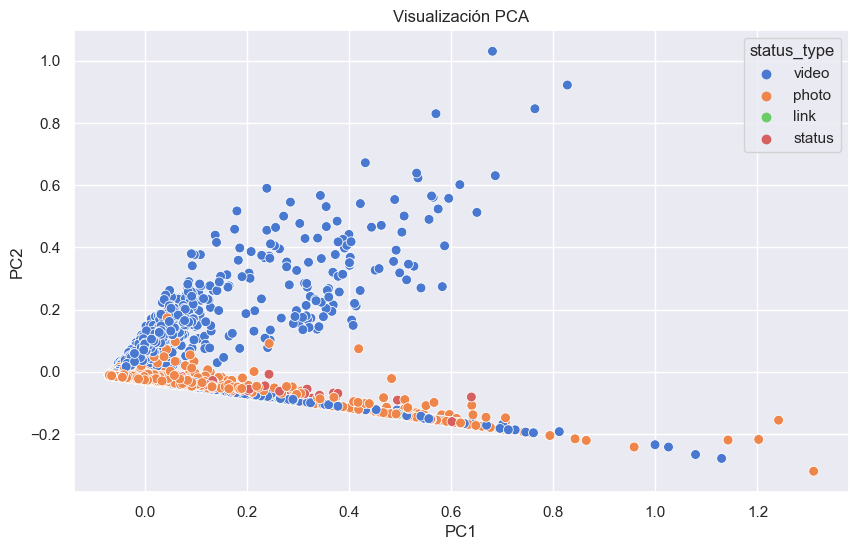

In [57]:
# hacemos un scatterplot del pca

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='status_type', data=df_pca, palette='muted', s=50)
plt.title('Visualización PCA')

plt.show()

In [58]:
pca.components_

array([[ 0.7042012 ,  0.06574419,  0.09210515,  0.67500068,  0.16809693,
         0.06782448,  0.0400043 ,  0.02201768,  0.02696719],
       [-0.09494102,  0.38194498,  0.43492319, -0.21432882,  0.72211925,
         0.1883846 ,  0.16880162,  0.10715533,  0.11440276]])

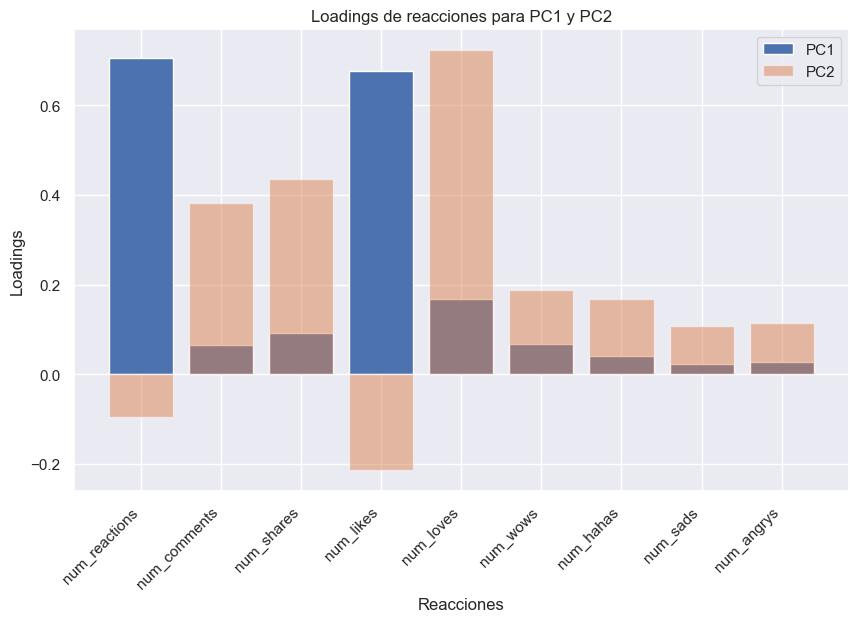

In [59]:
# Obtener los loadings
loadings = pca.components_[:2, :].T

# Crear un DataFrame para visualizar los loadings
# Asegúrate de que los índices coincidan con la cantidad de filas en 'loadings'
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# Graficar los loadings
plt.figure(figsize=(10, 6))
plt.bar(df_loadings.index, df_loadings['PC1'], label='PC1')
plt.bar(df_loadings.index, df_loadings['PC2'], label='PC2', alpha=0.5)
plt.xlabel('Reacciones')
plt.ylabel('Loadings')
plt.title('Loadings de reacciones para PC1 y PC2')
plt.legend()

plt.xticks(rotation=45, ha="right")

plt.show()

Podemos ver que “num_reactions” y “num_likes” tienen cargas bastante altas en PC1, lo que indica que estas características contribuyen fuertemente a la variabilidad en ese componente principal.
Las cargas para PC2 son generalmente más bajas, con variaciones menores entre ellas.

En resumen, el gráfico muestra cómo cada una de estas características contribuye a la variabilidad capturada por los dos primeros componentes principales en el conjunto de datos. Las características con barras más altas son las que más contribuyen a la variabilidad en ese componente principal. En este caso, “num_reactions” y “num_likes” son las características más importantes para PC1.

ALGORITMO K MEANS:

Emplearemos el Elbow method para determinar el número de clusters óptimo:

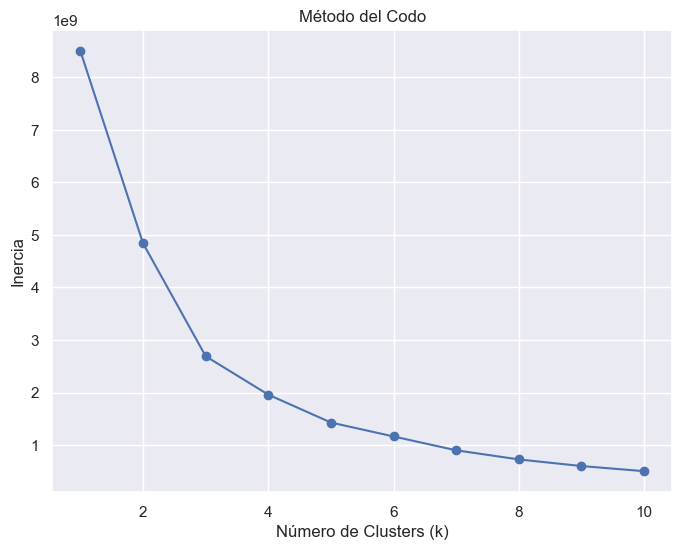

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Lista para almacenar las sumas de inercia
inertia = []

# Probamos diferentes valores de k (es decir, el número de clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Añadimos la inercia (suma de los cuadrados intra-cluster) a la lista
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()


Se muestra un cambio pronunciado en la inercia alrededor del punto k=3, incluso en K=4 (Habría que valorar qué número de clusters sería el óptimo en este caso)

Si escogemos K=4 vemos que es, a partir de ese punto, donde la tasa de disminución en la inercia se ralentiza significativamente, lo que indica que agregar más clusters no resultará en una mejora significativa de la inercia.

Todo indica que el valor óptimo son 3 clusters, pero vamos primero a probar el modelo con 4 clusters, y después compararemos los 2 resultados.

Adicionalmente podemos también buscar el Knee method que también nos da el número óptimo de clusters.

In [61]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

3

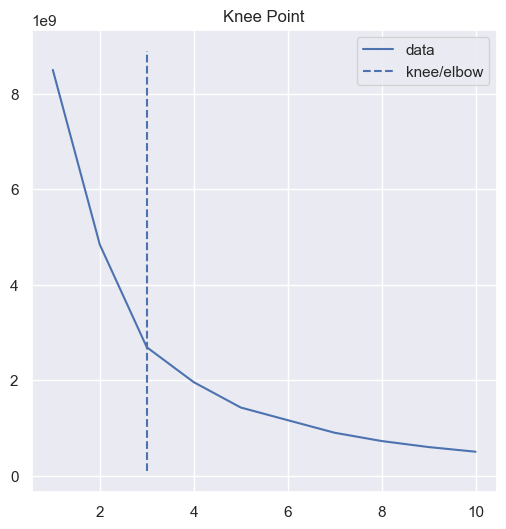

In [62]:
kl.plot_knee()

In [63]:
from sklearn.cluster import KMeans

# Aunque podemos ver que el número óptimo de clústers es 3, haremos un KMeans con 4 clusters para ver qué resultado obtenemos.

kmeans = KMeans(n_clusters=4, random_state=42)


In [64]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [65]:
# Ajustamos el modelo

labels = kmeans.fit(X_pca)      

In [66]:
df_pca.columns

Index(['PC1', 'PC2', 'status_type'], dtype='object')

In [67]:
label_mapping = {'video': 3, 'photo': 1, 'link': 0, 'status':2}
true_labels = df_pca['status_type'].map(label_mapping)



In [68]:
true_labels

0       3
1       1
2       3
3       1
4       1
       ..
6992    1
6993    1
6994    1
6995    1
6996    1
Name: status_type, Length: 6997, dtype: int64

In [69]:

true_labels = df_pca['status_type'].map(label_mapping)

# etiquetas predichas por KMeans
predicted_labels = kmeans.labels_


print("Etiquetas Reales:", true_labels.head(10).tolist())
print("Etiquetas Predichas:", predicted_labels[:10].tolist())

# etiquetas correctas
correct_labels = sum(true_labels == predicted_labels)

#  recisión
accuracy = correct_labels / len(true_labels)

print("Correct Labels:", correct_labels)
print("Accuracy:", accuracy)


Etiquetas Reales: [3, 1, 3, 1, 1, 1, 3, 3, 1, 1]
Etiquetas Predichas: [3, 0, 0, 0, 0, 0, 3, 3, 0, 0]
Correct Labels: 990
Accuracy: 0.1414892096612834


Los resultados son malos utilizando 4 clústers. Procederemos en adelante a utilizar 3 clusters.

In [71]:
kmeans.inertia_

32.65193799973003

In [72]:
kmeans.cluster_centers_

array([[-0.0504165 , -0.01214709],
       [ 0.35897949,  0.36980345],
       [ 0.48977118, -0.12922687],
       [ 0.05505468,  0.04812833]])

In [73]:
pca.explained_variance_ratio_

array([0.66360866, 0.20004078])

In [74]:
# print(pca.explained_variance_)

pca.explained_variance_

array([0.01854478, 0.00559021])

In [75]:
varianza_acumulativa = np.cumsum(pca.explained_variance_ratio_)
print("Varianza acumulativa hasta el segundo componente:", varianza_acumulativa[1])

Varianza acumulativa hasta el segundo componente: 0.8636494364052212


In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista para almacenar los valores de la silueta
silhouette_scores = []

# Probamos diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Resultados de silueta por cluster
for k, silhouette_value in enumerate(silhouette_scores, 2):
    print(f'Clusters: {k}, Silhouette Score: {silhouette_value}')


Clusters: 2, Silhouette Score: 0.831556053760804
Clusters: 3, Silhouette Score: 0.8335522726298525
Clusters: 4, Silhouette Score: 0.6756084329176958
Clusters: 5, Silhouette Score: 0.7172957549808155
Clusters: 6, Silhouette Score: 0.68116889487715
Clusters: 7, Silhouette Score: 0.6815217387643594
Clusters: 8, Silhouette Score: 0.6851193910355413
Clusters: 9, Silhouette Score: 0.7003136027723186
Clusters: 10, Silhouette Score: 0.669407833320509


Conprobamos que el coeficiente de silueta más alto es con 3 clusters. Procedemos por tanto a elegir 3 clusters con el algoritmo K-means

In [77]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11), inertia, curve = "convex", direction = "decreasing")

kl.elbow

3

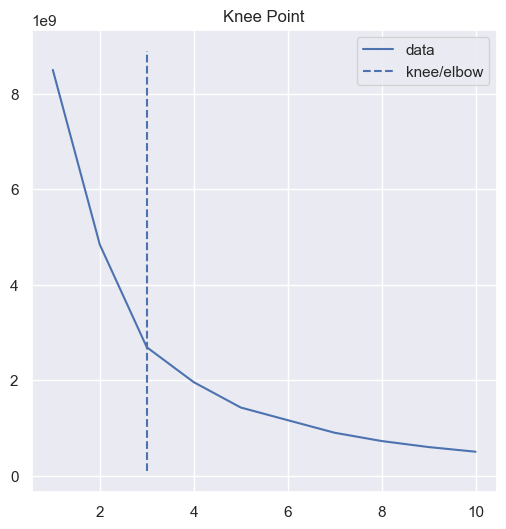

In [78]:
kl.plot_knee()

La línea punteada vertical etiquetada como “knee/elbow” indica el punto donde ocurre un cambio notable en la tasa de cambio de la curva. Como cabía esperar, ese punto se encuentra alrededor del valor 3 en el eje x, y puede por tanto considerarse el valor óptimo de clusters, tal y como hemos concluido anteriormente.

In [79]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=kl.elbow, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [80]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [81]:
# con silhouette evaluamos la calidad de los clusters - comprobamos que nos da el resultado antes obtenido.
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8335522726298525


In [82]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(X_pca)
    score=silhouette_score(X_pca,kmeans.labels_)
    silhouette_coefficients.append(score)

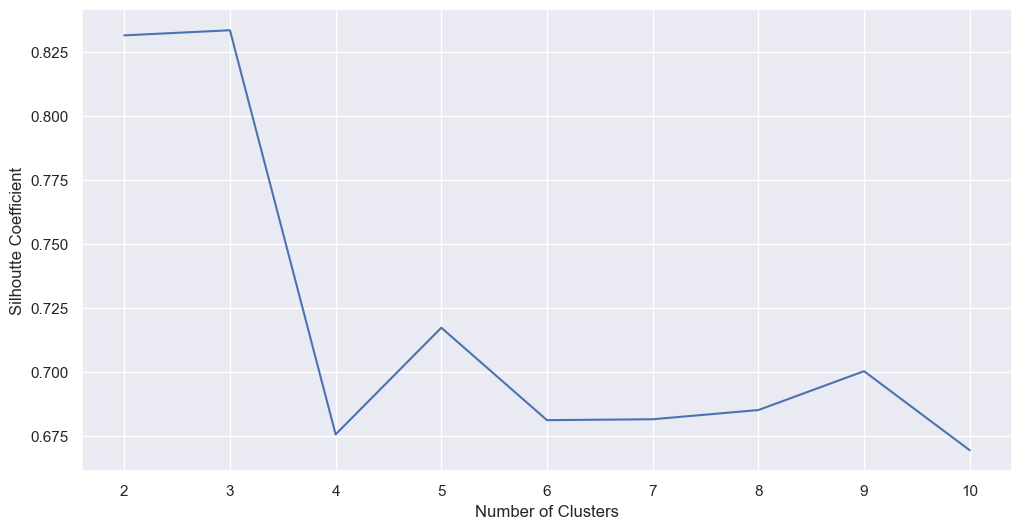

In [83]:
## silhouette score-- podemos hacer el gráfico para nuestra confirmación. No será necesario probar clusters más allá de 4.

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()

El gráfico muestra un pico en 3 clusters con un coeficiente de silueta cercano a 0.825. Esto sugiere que 3 es el número óptimo de clusters para este conjunto de datos, ya que es donde el coeficiente de silueta alcanza su valor máximo, y después ya hay una bajada drástica del coeficiente de silueta para  4 clusters.

In [84]:
# K = 3  (Utilizamos el valor óptimo de clusters)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [85]:
# 'true_labels' contiene las etiquetas reales de datos:

true_labels = df_pca['status_type'].map(label_mapping)

# Obtenemos las etiquetas predichas por KMeans:

predicted_labels = kmeans.labels_


print("Etiquetas Reales:", true_labels.head(10).tolist())
print("Etiquetas Predichas:", predicted_labels[:10].tolist())

# Calculamos las etiquetas correctas
correct_labels = sum(true_labels == predicted_labels)

# Calculamos la precisión
accuracy = correct_labels / len(true_labels)

print("Correct Labels:", correct_labels)
print("Accuracy:", accuracy)

Etiquetas Reales: [3, 1, 3, 1, 1, 1, 3, 3, 1, 1]
Etiquetas Predichas: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Correct Labels: 4050
Accuracy: 0.5788194940688867


In [86]:
import pandas as pd

data = {'True Labels': true_labels, 'Predicted Labels': predicted_labels}


df_etiquetas= pd.DataFrame(data)

df_etiquetas['Correct Labels'] = df_etiquetas['True Labels'] == df_etiquetas['Predicted Labels']

df_etiquetas


,True Labels,Predicted Labels,Correct Labels
0,3,1,False
1,1,1,True
2,3,1,False
3,1,1,True
4,1,1,True
...,...,...,...
6992,1,1,True
6993,1,1,True
6994,1,1,True
6995,1,1,True


In [87]:
df_etiquetas['Predicted Labels'].value_counts()

Predicted Labels
1    6452
0     374
2     171
Name: count, dtype: int64

In [88]:
df_etiquetas['True Labels'].value_counts()

True Labels
1    4242
3    2333
2     359
0      63
Name: count, dtype: int64

Podemos concluir que el número óptimo de clusters es de 3, dando un accuracy del 57.88% y un coeficiente de silueta del 83.33%.

### Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

En este caso, probaremos los algoritmos con PCA y sin PCA

Clustering jerárquico sin PCA:

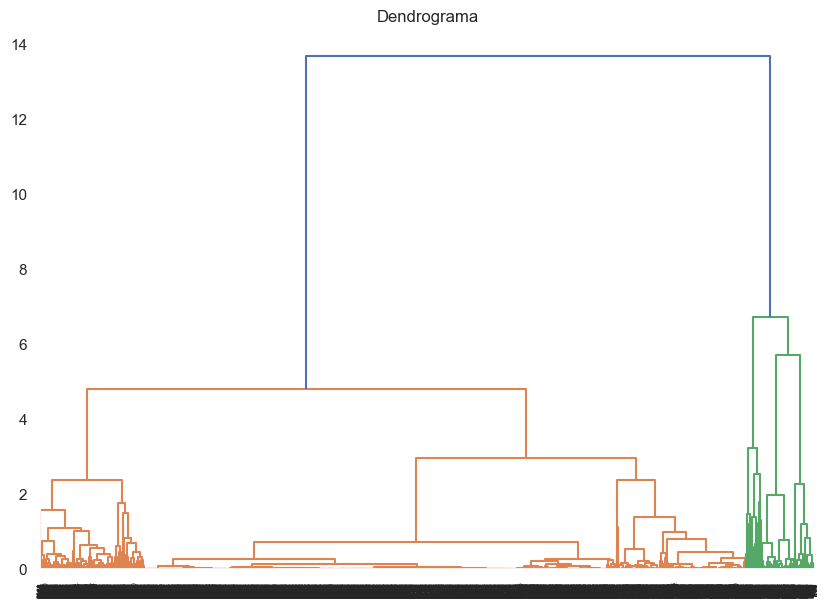

In [89]:
# Realizamos dendrograma sin pca con los datos escalados. Utilizaremos Euclidian/Ward - 'ward': Minimiza la varianza entre los clústeres.


import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend_1 = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

El dendrograma sugiere que hay dos clusters principales. Sin embargo, también hay varios subclusters más pequeños visibles a alturas más bajas en el eje y, mostrando una jerarquía detallada de agrupación de datos. Para este caso escogeremos 3 clusters.

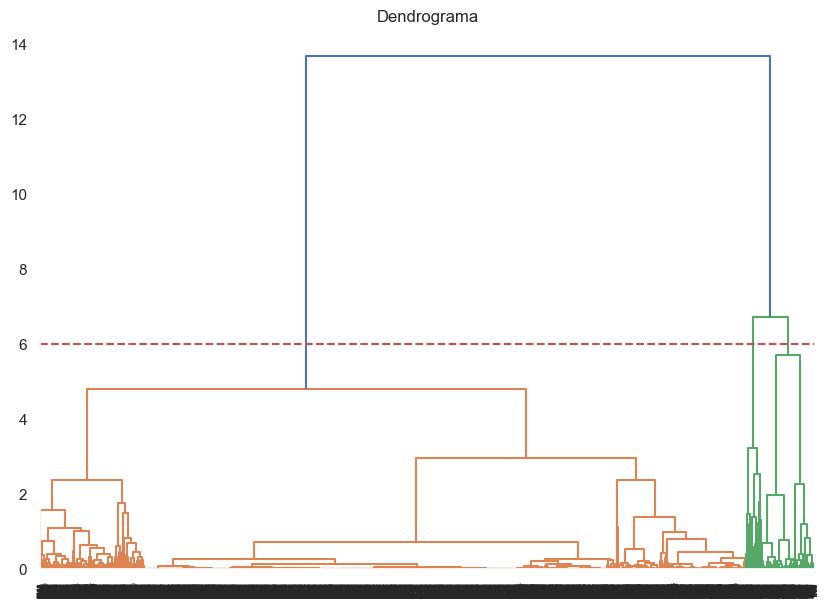

In [90]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend_1 = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Hay varios clusters pequeños a una baja altura (cerca del eje y=0), lo que indica una alta similitud entre esos elementos. A medida que nos movemos hacia arriba en el gráfico, los clusters se combinan en grupos más grandes, indicando una menor similitud.

En general, se puede decir que los clusters que se encuentran más cerca en el dendrograma son más similares entre sí que los que están más alejados. 

In [91]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

cluster_ew = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_ew.fit_predict(X_scaled)

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
labels_ew = cluster_ew.labels_

In [93]:
print("Coeficiente de silueta euclidean/ward:", silhouette_score(X_scaled, labels_ew, metric='euclidean'))

Coeficiente de silueta euclidean/ward: 0.7923028972020669


In [94]:
true_labels = df['status_type'].map(label_mapping)

In [95]:
from sklearn.metrics import accuracy_score


# Calculamos la precisión para euclidean-ward
accuracy = accuracy_score(true_labels, labels_ew)

print(f'Precisión del clustering: {accuracy:.2%}')

Precisión del clustering: 57.12%


El modelo euclidean/ward con 3 clusters sin pca, nos da un acuracy en la clasificación del 57.12%

In [96]:
data_ew = {'True Labels': true_labels, 'Predicted Labels': labels_ew}


df_labels_ew= pd.DataFrame(data_ew)

df_labels_ew['Correct Labels'] = df_labels_ew['True Labels'] == df_labels_ew['Predicted Labels']

df_labels_ew

,True Labels,Predicted Labels,Correct Labels
0,3,1,False
1,1,1,True
2,3,1,False
3,1,1,True
4,1,1,True
...,...,...,...
6992,1,1,True
6993,1,1,True
6994,1,1,True
6995,1,1,True


### Visualizamos los clústers

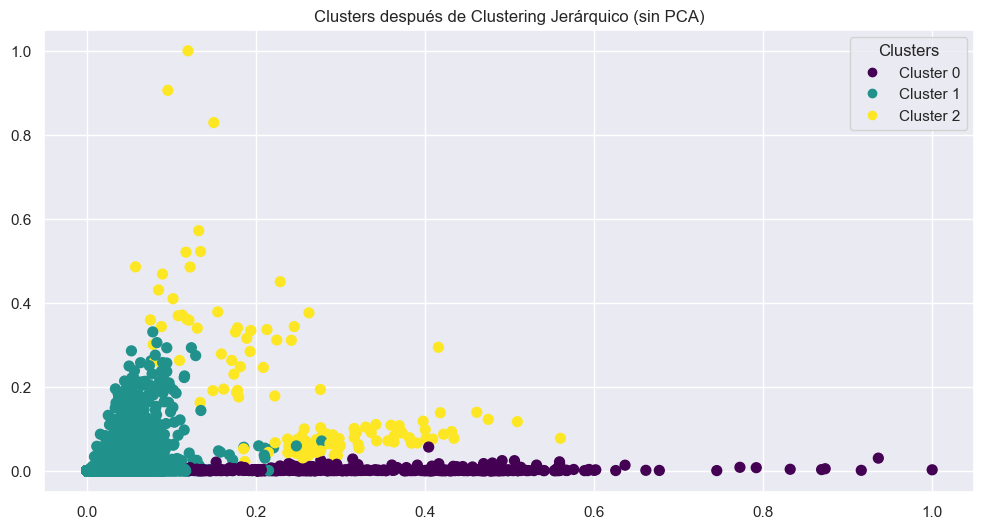

In [97]:
import matplotlib.pyplot as plt

# Visualizar los clusters
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_ew.labels_, cmap='viridis', marker='o', s=50)


legend_labels = [f'Cluster {i}' for i in range(len(set(cluster_ew.labels_)))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.title("Clusters después de Clustering Jerárquico (sin PCA)")

plt.show()


Los puntos en el gráfico representan datos individuales agrupados en 3 clusters basados en sus características similares.

 La ausencia de PCA en este caso, implica la presencia de de datos individuales que pueden estar cruzados en los clusters, no estando del todo bien definidos. Podemos observar algunos datos mezclados en los clusters.

Si  buscamos agrupaciones densas de puntos,  el Cluster 1 (verde) se podría considerar el “mejor” porque los puntos están muy juntos. Sin embargo, si estamos buscando agrupaciones que cubran una amplia gama de valores en el eje X, podríamos considerar el Cluster 0 (morado).

Los puntos dispersos en un cluster, como los que se observan en el Cluster 2 (amarillo), pueden indicar una mayor variabilidad dentro de ese grupo. Esto podría ser el resultado de ruido en los datos, o podría indicar subgrupos dentro del cluster.

Clustering jerárquico con PCA:

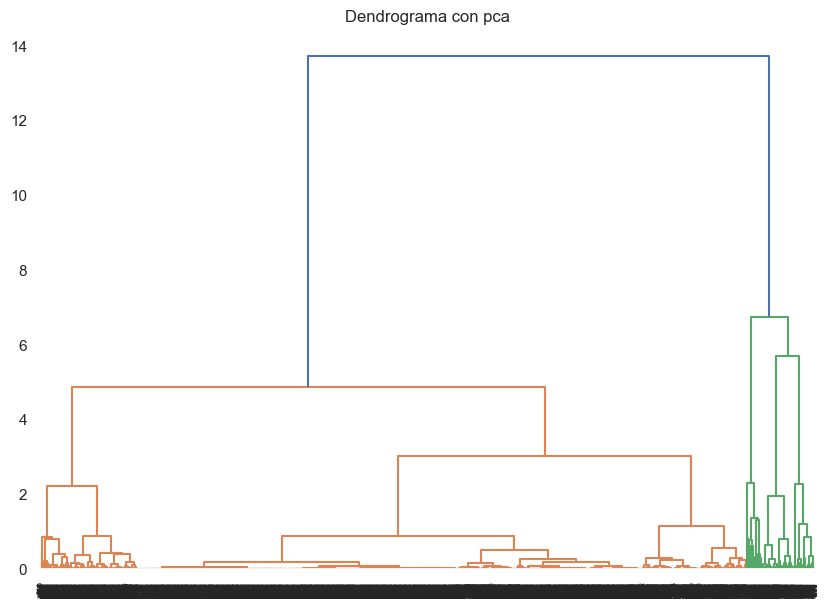

In [98]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma con pca")  
dend_pca = shc.dendrogram(shc.linkage(X_pca, method='ward'))

In [99]:
from sklearn.cluster import AgglomerativeClustering

# En lugar de trazar la línea de número de clusters manualmente, como hemos hecho con anterioridad, 
# podemos definir la altura de corte con distance_threshold. En este caso será en 6

dend_pca = AgglomerativeClustering(n_clusters=None, distance_threshold=6)
dend_pca.fit(X_pca)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

In [100]:
# obtenemos el número de clusters 

print("nº de clusters:", dend_pca.n_clusters_)

nº de clusters: 3


In [101]:
dend_pca.fit_predict(X_pca)

array([1, 1, 1, ..., 1, 1, 1])

In [102]:
labels_pca = dend_pca.labels_

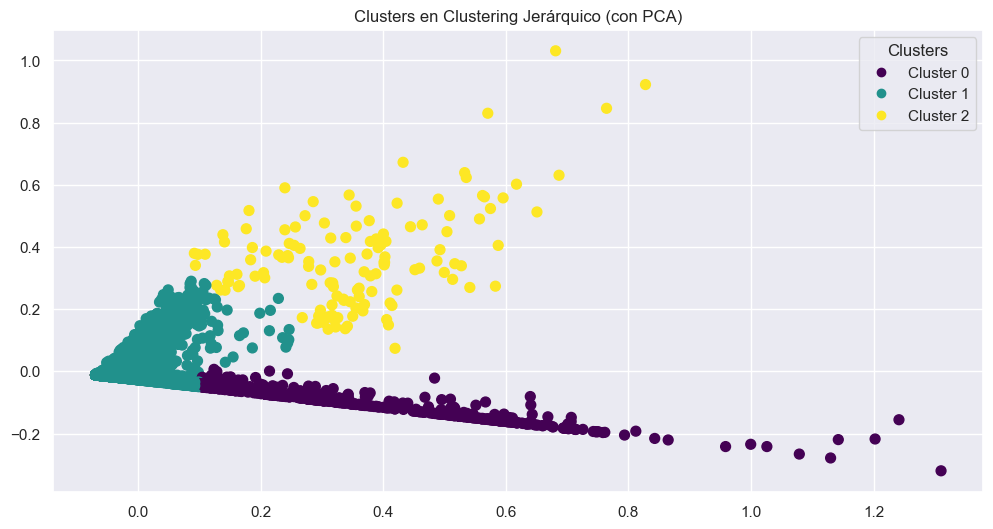

In [103]:
import matplotlib.pyplot as plt

# Visualizar los clusters
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dend_pca.labels_, cmap='viridis', marker='o', s=50)


legend_labels = [f'Cluster {i}' for i in range(len(set(dend_pca.labels_)))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.title("Clusters en Clustering Jerárquico (con PCA)")

plt.show()

Con PCA, vemos que los clusters están bastante mejor definidos que en el caso anterior sin PCA. Nos da una agrupación de los mismos más óptima.

In [104]:
accuracy = accuracy_score(true_labels, labels_pca)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5713877376018294


El accuracy empleando PCA mejora ligeramente.

In [105]:
data_pca = {'True Labels': true_labels, 'Predicted Labels': labels_pca}


df_etiquetas= pd.DataFrame(data_pca)

df_etiquetas['Correct Labels'] = df_etiquetas['True Labels'] == df_etiquetas['Predicted Labels']

df_etiquetas

,True Labels,Predicted Labels,Correct Labels
0,3,1,False
1,1,1,True
2,3,1,False
3,1,1,True
4,1,1,True
...,...,...,...
6992,1,1,True
6993,1,1,True
6994,1,1,True
6995,1,1,True


In [106]:
print("Silueta euclidean/ward con pca:", silhouette_score(X_pca, labels_pca, metric='euclidean'))

Silueta euclidean/ward con pca: 0.8150125817885737


Tras la utilización de los algoritmos K-means y clustering jerárquico podemos concluir que la información contenida en el dataset que hemos utilizado, no ofrecen unos resultados realmente óptimos de agrupación y clasificación. De ahí que los rendimientos obtenidos no superen el 60% de accuracy.

Tanto el algoritmo K-means como el de clustering jerárquico (ambos con pca) nos da rendimientos muy similares, prácticamente coincidentes.

Clustering jerárquico: Tenemos un valor alto del coeficiente de silueta de 0.815 que se acerca bastante a 1, e indica que los objetos dentro de un cluster son similares entre sí y están bien separados de los otros clusters. Los clusters están bien definidos.

La precisión del algoritmo jerárquico es relativamente moderada con un 0.57138, y hace referencia a la proporción de instancias correctamente clasificadas, que vienen a ser aproximadamente del 57.14%.

El clustering jeráquico sin PCA nos da Precisión del clustering de 57.12%, ligeramente inferior que con PCA (57.14%). Es preferible utilizar los algoritmos con PCA.

El K means con PCA tiene un Silhouette Score de 0.83355, y un accuracy  de 0.578819, que es ligeramente superior al obtenido en el clustering jerárquico.


